<a href="https://colab.research.google.com/github/Yicheng-1215/sparcs_descriptive_2022/blob/main/SPARCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import gdown

# Replace 'FILE_ID' with the actual file ID from your Google Drive link
file_id = '1LEJOx6Tyh9SERPOz4C2hRroYBG2jfRZn'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'sparcs_2022.csv'
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1LEJOx6Tyh9SERPOz4C2hRroYBG2jfRZn
From (redirected): https://drive.google.com/uc?id=1LEJOx6Tyh9SERPOz4C2hRroYBG2jfRZn&confirm=t&uuid=8355d15a-96a7-4934-98cd-b5ee330aeb7a
To: /content/sparcs_2022.csv
100%|██████████| 831M/831M [00:09<00:00, 84.7MB/s]


'sparcs_2022.csv'

In [40]:
# Load the first 1,000 rows
df_small = pd.read_csv('sparcs_2022.csv', nrows=1000)

# Save the smaller sample to a new file
df_small.to_csv('sparcs_2022_small_1000.csv', index=False)

# View the first few rows
print(df_small.head())

# Check the column names
print(df_small.columns)

  Hospital Service Area Hospital County  Operating Certificate Number  \
0         New York City           Bronx                     7000006.0   
1         New York City           Bronx                     7000006.0   
2         New York City           Bronx                     7000006.0   
3         New York City           Bronx                     7000006.0   
4         New York City           Bronx                     7000006.0   

   Permanent Facility Id                                      Facility Name  \
0                 3058.0  Montefiore Med Center - Jack D Weiler Hosp of ...   
1                 3058.0  Montefiore Med Center - Jack D Weiler Hosp of ...   
2                 3058.0  Montefiore Med Center - Jack D Weiler Hosp of ...   
3                 3058.0  Montefiore Med Center - Jack D Weiler Hosp of ...   
4                 1168.0       Montefiore Medical Center-Wakefield Hospital   

  Age Group Zip Code - 3 digits Gender                    Race  \
0  50 to 69         

In [45]:
# Remove commas and convert to numeric
df_small['Total Charges'] = df_small['Total Charges'].str.replace(',', '', regex=True).astype(float)

# Replace invalid values and make them NaN then fill with 0 and make column integers
df_small['Length of Stay'] = pd.to_numeric(df_small['Length of Stay'], errors='coerce').fillna(0).astype(int)

# Calculate descriptive statistics
print(df_small[['Length of Stay', 'Total Charges', 'Total Costs']].describe())

# Calculate the mean
mean_length_of_stay = df_small['Length of Stay'].mean()
mean_total_charges = df_small['Total Charges'].mean()
mean_total_costs = df_small['Total Costs'].mean()

print(f"Mean Length of Stay: {mean_length_of_stay}")
print(f"Mean Total Charges: {mean_total_charges}")
print(f"Mean Total Costs: {mean_total_costs}")


       Length of Stay  Total Charges   Total Costs
count     1000.000000   1.000000e+03  1.000000e+03
mean         5.959000   1.144449e+05  3.070237e+04
std          8.310619   2.852501e+05  9.832344e+04
min          0.000000   5.936220e+03  5.254900e+02
25%          2.000000   3.292215e+04  7.745858e+03
50%          3.000000   5.878383e+04  1.365855e+04
75%          7.000000   1.081704e+05  2.526158e+04
max         99.000000   7.107137e+06  2.613644e+06
Mean Length of Stay: 5.959
Mean Total Charges: 114444.91666
Mean Total Costs: 30702.36726


In [30]:
# Value counts for categorical columns
print(df_small['Age Group'].value_counts())
print(df_small['Gender'].value_counts())
print(df_small['Type of Admission'].value_counts())


Age Group
50 to 69       257
70 or Older    235
30 to 49       223
0 to 17        147
18 to 29       138
Name: count, dtype: int64
Gender
F    578
M    422
Name: count, dtype: int64
Type of Admission
Emergency    746
Elective     157
Newborn       51
Urgent        46
Name: count, dtype: int64


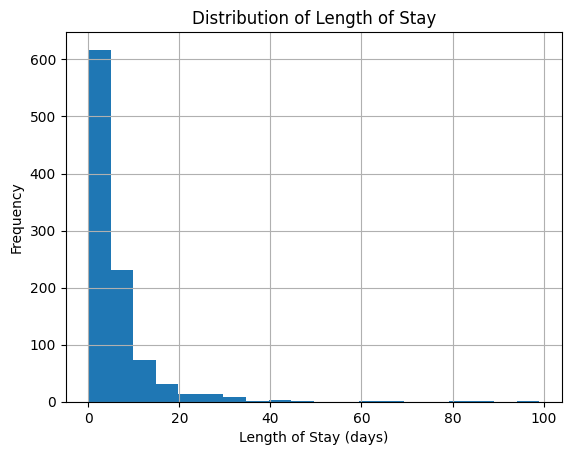

In [31]:
import matplotlib.pyplot as plt

df_small['Length of Stay'].hist(bins=20)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


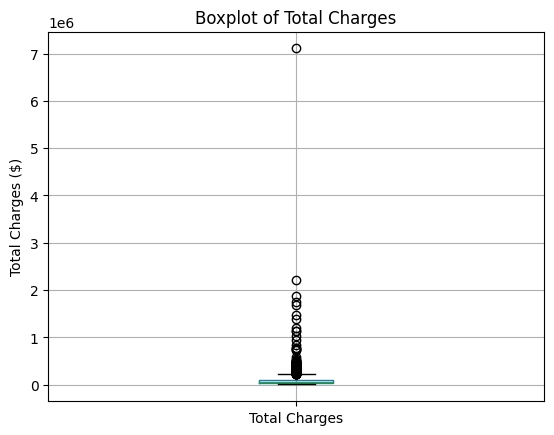

In [32]:
df_small.boxplot(column='Total Charges')
plt.title('Boxplot of Total Charges')
plt.ylabel('Total Charges ($)')
plt.show()


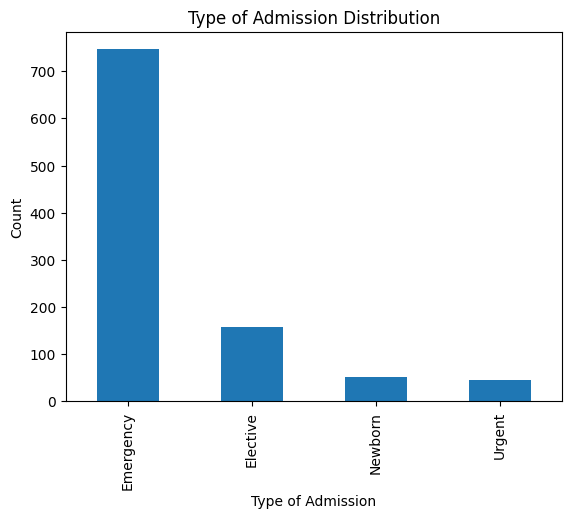

In [33]:
df_small['Type of Admission'].value_counts().plot(kind='bar')
plt.title('Type of Admission Distribution')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.show()


In [34]:
# Check for missing values
missing_values = df_small.isnull().sum()
print(missing_values)


Hospital Service Area                    2
Hospital County                          2
Operating Certificate Number             2
Permanent Facility Id                    2
Facility Name                            0
Age Group                                0
Zip Code - 3 digits                     35
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
Discharge Year                           0
CCSR Diagnosis Code                      0
CCSR Diagnosis Description               0
CCSR Procedure Code                    149
CCSR Procedure Description             149
APR DRG Code                             0
APR DRG Description                      0
APR MDC Code                             0
APR MDC Description                      0
APR Severity of Illness Code             0
APR Severit

In [35]:
# Example: Fill missing values in 'Length of Stay' with the mean
df_small['Length of Stay'].fillna(df_small['Length of Stay'].mean(), inplace=True)


<ipython-input-35-2c774be394d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_small['Length of Stay'].fillna(df_small['Length of Stay'].mean(), inplace=True)
